# Framework:
   - load chicago crime map
   - build function to count every crime within neighborhood
   - plot every community by the number of crime counts
   - eyeball communities we will stay through plot
   - slice dataframe for each chosen community
   - build another function to count crime happened within 0.1km range of each airbnb list
   - select listing we can book by sort crime coounts

In [2]:
# hello.py - http://www.graphviz.org/content/hello

from graphviz import Digraph

g = Digraph('G', filename='hello.gv')

g.edge('Hello', 'World')



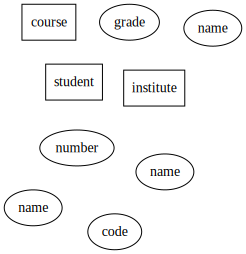

In [24]:
from graphviz import Graph

e = Graph('ER', filename='er.gv', engine='neato')

e.attr('node', shape='box')
e.node('course')
e.node('institute')
e.node('student')

e.attr('node', shape='ellipse')
e.node('name0', label='name')
e.node('name1', label='name')
e.node('name2', label='name')
e.node('code')
e.node('grade')
e.node('number')

e

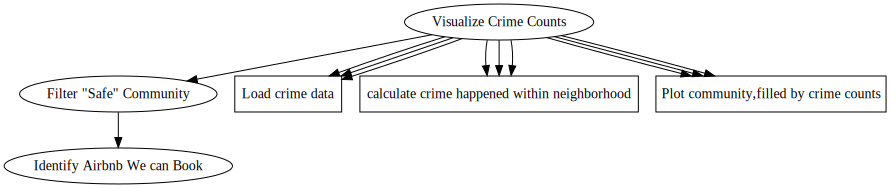

In [27]:
from graphviz import Digraph

# dot = Digraph(comment='The Round Table')
# dot.attr(color='blue', style='filled')
# dot.node('A', 'Visualize Crime Counts')
# dot.node('B', 'Filter "Safe" Community')
# dot.node('C', 'Identify Airbnb We can Book')

# dot.edges(['AB', 'BC'])




dot.attr('node', shape='box')
dot.attr(color='orange', style='filled')
dot.node('D',"Load crime data")
dot.node('E','calculate crime happened within neighborhood')
dot.node('F','Plot community,filled by crime counts')
dot.edges(['AD','AE',"AF"])
dot

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mp
import geopandas as gpd
import descartes
import matplotlib.pyplot as plt

In [2]:
# load chicago community map
fp = "Chicago_Community_Areas.shp"
map_df = gpd.read_file(fp)


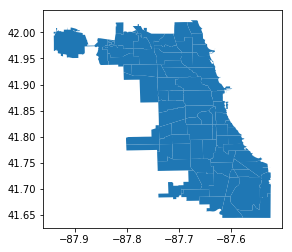

In [3]:
map_df.plot()

In [4]:
map1 = pd.DataFrame(map_df)


In [5]:
# load crime data 
data = pd.read_csv("Crimes_-_Map (1).csv")


In [6]:
import shapefile as shp
from shapely import geometry
from shapely.geometry import Point 
from shapely.geometry import shape
import csv
from shapely.geometry.polygon import Polygon

In [7]:
sf = shp.Reader("Chicago_Community_Areas") 
sfRec = sf.records()

n = 0
m = 1
coorDict = {}
matplotDict = []
muniFinal = {}

for shape in sf.shapeRecords(): #Iterate through shapes in shapefile
    x = [i[0] for i in shape.shape.points[:]] #Initially for use in matplotlib to check shapefile
    y = [i[1] for i in shape.shape.points[:]] #Initially for use in matplotlib to check shapefile
    for i in x:
        matplotDict.append((x[x.index(i)],y[x.index(i)])) #Convert coordinates to be read by Shapely pkg

    munishp = Polygon(matplotDict)
    muniFinal[sfRec[n][0]] = munishp #Store shape in dictionary with key of municipality
    
    matplotDict = [] #refresh coordinate store for next shape   
    n += 1 
n = 0

In [8]:
lat = data['LATITUDE']
pd.Series(lat).astype(float)
lon = data['LONGITUDE']
pd.Series(lon).astype(float)
coor = list(zip(lon,lat))
coordict = {}
for i in  range(len(coor)):
  coorDict[i]=coor[i]


In [9]:
result = []
for j in coorDict:
    for k in muniFinal:
        if Point(coorDict[j]).within(muniFinal[k]):
            result.append(k-1)


In [10]:
fre=[]
def CountFrequency(my_list): 
  
    # Creating an empty dictionary  
    freq = {} 
    for item in my_list: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1

    for key, value in freq.items(): 
         fre.append((key, value))
    
if __name__ == "__main__":  
    my_list = result
    CountFrequency(my_list)

freDict = dict(fre)
freq = [(k,freDict[k]) for k in sorted(freDict.keys())] 
datafre = pd.DataFrame(freq)
datafre = datafre.rename(columns = {1:'crime'})
datafre = datafre.set_index(0)

In [11]:
map2 = map1.join(datafre)
map2['crime'].fillna(0,inplace=True)
a = map2['COMMUNITY']
b = map2['crime']
map3 = pd.DataFrame([a,b])
map3 = map3.T

In [12]:
merged = map_df.set_index('COMMUNITY').join(map3.set_index('COMMUNITY'))
merged.sort_values('crime',inplace=True,ascending=True)


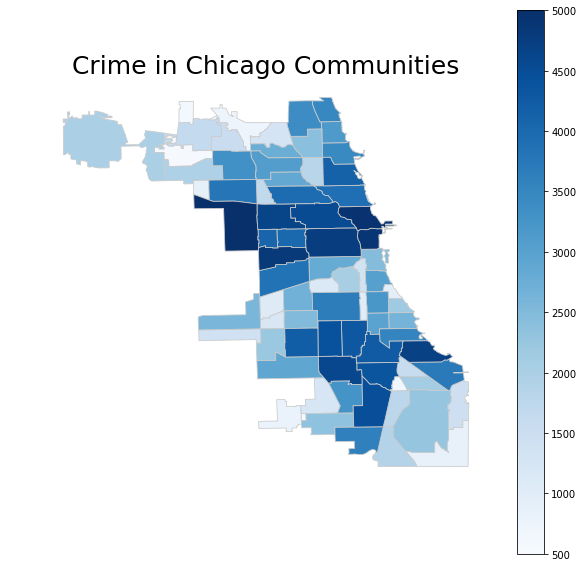

In [13]:
# plot crime frequency for chicago
variable = 'crime'
vmin, vmax = 500, 5000
fig, ax = plt.subplots(1, figsize=(10, 10))
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title('Crime in Chicago Communities', fontdict={'fontsize': '25', 'fontweight' : '3'})
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

In [14]:
canDict = dict((k,muniFinal[k])for k in (35,38,39))
canDict

{35: <shapely.geometry.polygon.Polygon at 0x1190a09e8>,
 38: <shapely.geometry.polygon.Polygon at 0x1190a0a90>,
 39: <shapely.geometry.polygon.Polygon at 0x1190a0ac8>}

In [15]:
# store every location within three 
# chosen neighbhoods
can = []
for j in coorDict:
    for k in canDict:
        if Point(coorDict[j]).within(canDict[k]):
            can.append((coorDict[j]))

In [16]:
# slice 'near south side' crime locations
can_a=[]
for q in range(0,len(can)):
    if Point(can[q]).within(canDict[35]):
        can_a.append(can[q])

In [17]:
# slice 'armour square' crime locations
can_b=[]
for x in range(0,len(can)):
    if Point(can[x]).within(canDict[38]):
        can_b.append(can[x])

In [18]:
# slice 'bridgeport' crime locations
can_c=[]
for y in range(0,len(can)):
    if Point(can[y]).within(canDict[39]):
        can_c.append(can[y])

In [19]:
crime_count=len(can_c)+len(can_b)+len(can_a)+1

In [20]:
# how many elements in three neighbourhood?
print("Crime Couunts for filtered neighborhoods:"+ "%s" %crime_count)

Crime Couunts for filtered neighborhoods:4334


From the map,the neighbourhood we selected are **Near South Side**, **Armour Sqaure** and **Bridgeport**.

In [21]:
neigh_selec=['Near South Side','Bridgeport','Armour Sqaure']

In [22]:
airbnb_df= pd.read_csv("listings.csv")

In [23]:
#### get three community airbnb listing separated 

# near south side 
airbnb_df_35=airbnb_df.loc[(airbnb_df['neighbourhood_cleansed']=='Near South Side')].reset_index()

# ARMOUR SQUARE
airbnb_df_38=airbnb_df.loc[(airbnb_df['neighbourhood_cleansed']=='Armour Square')].reset_index()

# bridgeport               
airbnb_df_39=airbnb_df.loc[(airbnb_df['neighbourhood_cleansed']=='Bridgeport')].reset_index()
         

In [24]:
## code chuck for calculating distance 
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [48]:
can_a=np.array(can_a)

In [49]:
# create a dataframe to store all the distance for community 33
distance_a=pd.DataFrame(data=np.zeros((can_a.shape[0],airbnb_df_35.shape[0])))

In [50]:
# checking crime counts for near south 
# side for every listing within 0.1km
import gc
for i in list(distance_a.columns):
    # loop over every listing
    lat1 = list(airbnb_df_35.loc[i,['latitude','longitude']].values)[0]
    lon1 = list(airbnb_df_35.loc[i,['latitude','longitude']].values)[1]
    
    for j in range(0,can_a.shape[0]):
        # loop over every crime 
        lat2 = can_a[j,][1]
        lon2 = can_a[j,][0]
        # print(j)
        distance_a.loc[j,i]=haversine(lon1,lat1,lon2,lat2)
        gc.enable()
        if j % 100== 0:
            # print("%s"%j+" times done!")
            gc.collect()
    if i%10 ==0:
        print("%s"%i+" listing done!")

0 listing done!
10 listing done!
20 listing done!
30 listing done!
40 listing done!
50 listing done!
60 listing done!
70 listing done!
80 listing done!
90 listing done!
100 listing done!
110 listing done!
120 listing done!
130 listing done!
140 listing done!


In [51]:
count_list=[]
for listing in list(distance_a.columns):
    count=np.sum(distance_a.loc[:,listing].values<=0.1)
    count_list.append(count)

In [52]:
len(count_list)

142

In [53]:
airbnb_df_35['crime_within_pt1']=count_list

In [54]:
final_for_nearlakeside=airbnb_df_35.sort_values(by='crime_within_pt1',ascending=True)

In [28]:
final_for_nearlakeside.head(10)

NameError: name 'final_for_nearlakeside' is not defined

In [76]:
final_for_nearlakeside.to_csv("final_for_nearlakeside.csv")

----

In [55]:
can_b=np.array(can_b)

In [56]:
# create a dataframe to store all the distance for community 38
distance_b=pd.DataFrame(data=np.zeros((can_b.shape[0],airbnb_df_38.shape[0])))

In [57]:
# checking crime counts for near armour
# square for every listing within 0.1km

for i in list(distance_b.columns):
    # loop over every listing
    lat1 = list(airbnb_df_38.loc[i,['latitude','longitude']].values)[0]
    lon1 = list(airbnb_df_38.loc[i,['latitude','longitude']].values)[1]
    
    for j in range(0,can_b.shape[0]):
        # loop over every crime 
        lat2 = can_b[j,][1]
        lon2 = can_b[j,][0]
        # print(j)
        distance_b.loc[j,i]=haversine(lon1,lat1,lon2,lat2)
        gc.enable()
        if j % 100== 0:
            # print("%s"%j+" times done!")
            gc.collect()
    if i%10 ==0:
        print("%s"%i+" listing done!")

0 listing done!
10 listing done!
20 listing done!
30 listing done!
40 listing done!
50 listing done!
60 listing done!
70 listing done!
80 listing done!


In [58]:
count_list=[]
for listing in list(distance_b.columns):
    count=np.sum(distance_b.loc[:,listing].values<=0.1)
    count_list.append(count)

In [59]:
airbnb_df_38['crime_within_pt1']=count_list

In [60]:
final_for_armoursquare=airbnb_df_38.sort_values(by='crime_within_pt1',ascending=True)

In [68]:
final_for_armoursquare

,index,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,...,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,crime_within_pt1
3,502,4503332,https://www.airbnb.com/rooms/4503332,20181115100644,2018-11-15,Near The Loop and McCormick Place,This is a fully furnished unit located on the ...,This is a 3 bed/1.5 bath fully furnished unit ...,This is a fully furnished unit located on the ...,none,...,R18000034071,"{""Illinois State"","" Cook County"","" IL"","" CHICA...",f,f,flexible,f,f,4,1.52,0
58,5137,24541340,https://www.airbnb.com/rooms/24541340,20181115100644,2018-11-15,中国旅游,"我的房子临街有一个小门进入,房子是黄色联排别墅房,但我有自己的独立进入出口与别家不同!园子里...",一间卧室可以住俩人一个双人床｡,"我的房子临街有一个小门进入,房子是黄色联排别墅房,但我有自己的独立进入出口与别家不同!园子里...",none,...,R18000034077,"{""Illinois State"","" Cook County"","" IL"","" CHICA...",f,f,moderate,f,f,2,2.86,0
37,3461,20177013,https://www.airbnb.com/rooms/20177013,20181115100644,2018-11-15,Room 11- Canal Inn FreeParking 24/7,Welcome to Chicago! Michael and I felt in lov...,- New bed and towels for every guest! - Walkin...,Welcome to Chicago! Michael and I felt in lov...,none,...,City registration pending,"{""Illinois State"","" Cook County"","" IL"","" CHICA...",t,f,strict_14_with_grace_period,f,f,12,3.79,1
43,3886,21204267,https://www.airbnb.com/rooms/21204267,20181115100644,2018-11-15,"Duplex south of Chicago Loop, Free Parking/WIFI","Duplex located in Bridgeport, Chicago. Great ...",My space is a newly renovated duplex. It is c...,"Duplex located in Bridgeport, Chicago. Great ...",none,...,City registration pending,"{""Illinois State"","" Cook County"","" IL"","" CHICA...",t,f,strict_14_with_grace_period,f,f,1,6.81,1
22,2811,18073252,https://www.airbnb.com/rooms/18073252,20181115100644,2018-11-15,"Sunny Home Chinatown, close to McCormick",This private apartment has 3 bedrooms that can...,NaN,This private apartment has 3 bedrooms that can...,none,...,C17000008460,"{""Illinois State"","" Cook County"","" IL"","" CHICA...",t,f,moderate,f,f,3,1.46,1
17,2315,15597127,https://www.airbnb.com/rooms/15597127,20181115100644,2018-11-15,中唐【302】Chinatown,Private bedroom with multiple bathrooms in a v...,"唐人街中心位置,交通､饮食方便,有地铁､巴士到市中心､机场,近默康尔中心唐人街中心区,周边各...",Private bedroom with multiple bathrooms in a v...,none,...,City registration pending,"{""Illinois State"","" Cook County"","" IL"","" CHICA...",t,f,moderate,f,f,10,3.56,1
11,1445,11661652,https://www.airbnb.com/rooms/11661652,20181115100644,2018-11-15,"268 Comfy, remodeled condo 4B in center Chinat...",Just finish remodeling (URL HIDDEN) good locat...,NaN,Just finish remodeling (URL HIDDEN) good locat...,none,...,City registration pending,"{""Illinois State"","" Cook County"","" IL"","" CHICA...",f,f,strict_14_with_grace_period,f,f,6,3.48,1
47,3975,21380109,https://www.airbnb.com/rooms/21380109,20181115100644,2018-11-15,308 Duplex Condo near by downtown and McCormic...,My place is in the heart of Chinatown resident...,NaN,My place is in the heart of Chinatown resident...,none,...,City registration pending,"{""Illinois State"","" Cook County"","" IL"","" CHICA...",t,f,strict_14_with_grace_period,f,f,6,1.88,2
0,373,3430491,https://www.airbnb.com/rooms/3430491,20181115100644,2018-11-15,Chinatown penthouse luxury loft,Fabulous penthouse loft with panoramic city sk...,"Vintage loft building, unique corner unit with...",Fabulous penthouse loft with panoramic city sk...,none,...,City registration pending,"{""Illinois State"","" Cook County"","" IL"","" CHICA...",f,f,moderate,f,f,1,4.24,2
6,942,7783924,https://www.airbnb.com/rooms/7783924,20181115100644,2018-11-15,Fantastic Guest room in Chinatown! ️,An exceptional experience within a wonderful 2...,"You get a private bedroom with a closet, hange...",An exceptional experience within a wonderful 2...,none,...,R17000015541,"{""Illinois State"","" Cook County"","" IL"","" C

In [78]:
final_for_armoursquare.to_csv("final_for_armoursquare.csv")

----

In [69]:
can_c =np.array(can_c)

In [70]:
# create a dataframe to store all the distance for community 39
distance_c=pd.DataFrame(data=np.zeros((can_c.shape[0],airbnb_df_39.shape[0])))

In [71]:
# checking crime counts for near bridgeport
# for every listing within 0.1km

for i in list(distance_c.columns):
    # loop over every listing
    lat1 = list(airbnb_df_39.loc[i,['latitude','longitude']].values)[0]
    lon1 = list(airbnb_df_39.loc[i,['latitude','longitude']].values)[1]
    
    for j in range(0,can_c.shape[0]):
        # loop over every crime 
        lat2 = can_c[j,][1]
        lon2 = can_c[j,][0]
        # print(j)
        distance_c.loc[j,i]=haversine(lon1,lat1,lon2,lat2)
        gc.enable()
        if j % 100== 0:
            # print("%s"%j+" times done!")
            gc.collect()
    if i%10 ==0:
        print("%s"%i+" listing done!")

0 listing done!
10 listing done!
20 listing done!
30 listing done!
40 listing done!
50 listing done!
60 listing done!
70 listing done!
80 listing done!
90 listing done!
100 listing done!


In [72]:
count_list=[]
for listing in list(distance_c.columns):
    count=np.sum(distance_c.loc[:,listing].values<=0.1)
    count_list.append(count)

In [73]:
airbnb_df_39['crime_within_pt1']=count_list

In [74]:
final_for_bridgeport=airbnb_df_39.sort_values(by='crime_within_pt1',ascending=True)

In [75]:
final_for_bridgeport

,index,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,...,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,crime_within_pt1
4,969,7935934,https://www.airbnb.com/rooms/7935934,20181115100644,2018-11-15,Completely private suite close to public transit,"This garden apartment is an open-concept, 550-...",This is a 550 sq. ft. room on the garden level...,"This garden apartment is an open-concept, 550-...",none,...,City registration pending,"{""Illinois State"","" Cook County"","" IL"","" CHICA...",f,f,strict_14_with_grace_period,f,f,1,4.76,0
73,5543,25572328,https://www.airbnb.com/rooms/25572328,20181115100644,2018-11-15,"Amazing Private Room on own fl. Downtown, Mcor...",Amazing private room with your own floor(1st f...,NaN,Amazing private room with your own floor(1st f...,none,...,R18000026859,"{""Illinois State"","" Cook County"","" IL"","" CHICA...",f,f,strict_14_with_grace_period,f,f,1,2.09,0
7,1356,10910665,https://www.airbnb.com/rooms/10910665,20181115100644,2018-11-15,Room for limited for 4 ppl =2 beds,My room can have 4 ppl at same time. For group...,If u have 1-4 people. My room for this locatio...,My room can have 4 ppl at same time. For group...,none,...,City registration pending,"{""Illinois State"","" Cook County"","" IL"","" CHICA...",f,f,moderate,f,f,4,1.36,0
70,5140,24544756,https://www.airbnb.com/rooms/24544756,20181115100644,2018-11-15,Serene single house by McCormick & Downtown,Located only a block from the big street wher...,"This is a clean and quiet neighborhood, next t...",Located only a block from the big street wher...,none,...,City registration pending,"{""Illinois State"","" Cook County"","" IL"","" CHICA...",f,f,strict_14_with_grace_period,f,f,2,5.10,1
78,5987,26817672,https://www.airbnb.com/rooms/26817672,20181115100644,2018-11-15,Vintage Bridgeport Garden Suite - Hott Location,This charming adult suite is located in a grea...,"Full-size bed, pull out queen-size sofa bed, a...",This charming adult suite is located in a grea...,none,...,R18000028010,"{""Illinois State"","" Cook County"","" IL""}",t,f,moderate,f,f,2,3.08,2
14,1847,13890897,https://www.airbnb.com/rooms/13890897,20181115100644,2018-11-15,One bedroom one bathroom APT,Quite location,安全､安静,Quite location,none,...,City registration pending,"{""Illinois State"","" Cook County"","" IL"","" CHICA...",t,f,moderate,f,f,1,3.26,2
96,7062,29076941,https://www.airbnb.com/rooms/29076941,20181115100644,2018-11-15,VALUE IKEA QUEEN SIZE BED EASY BUS TRAIN DOWNTOWN,Best pricing and value for the great and safe ...,NaN,Best pricing and value for the great and safe ...,none,...,d18154684,"{""Illinois State"","" Cook County"","" IL"","" CHICA...",t,f,moderate,f,f,1,0.91,2
105,7532,29940545,https://www.airbnb.com/rooms/29940545,20181115100644,2018-11-15,Beautiful 7Br 6200 sf Brick & Steel Custom Man...,"7 Bedroom, Incomparable 6,200 Square Foot Bric...",NaN,"7 Bedroom, Incomparable 6,200 Square Foot Bric...",none,...,City registration pending,"{""Illinois State"","" Cook County"","" IL"","" CHICA...",t,f,moderate,f,f,1,NaN,3
63,4616,23076088,https://www.airbnb.com/rooms/23076088,20181115100644,2018-11-15,Nice and Safe entire 2FL unit in the Chicago City,The entire 2nd FL unit in the nice and safe ne...,This is the entire 2 FL unit with living room ...,The entire 2nd FL unit in the nice and safe ne...,none,...,R17000015775,"{""Illinois State"","" Cook County"","" IL"","" CHICA...",f,f,moderate,f,f,2,0.62,3
64,4706,23380620,https://www.airbnb.com/rooms/23380620,20181115100644,2018-11-15,Bridgeport Beauty,Bridgeport is a unique & safe Chicago neighbor...,"This is a 5-room garden ""mother-in-law"" apartm...",Bridgeport is a unique & safe Chicago neighbor...,none,...,R18000024676,"{""Illinois State"","" Cook County"","" IL"","" CHICA...",t,f,moderate,f,f,1,3.93,3


In [77]:
final_for_bridgeport.to_csv("final_for_bridgeport.csv")